# Car Review Classification

# Imports

In [178]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


# Model Processing
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# K Best columns

# Functions

In [179]:
def check_for_dupes_nans(df:pd.DataFrame):
    """
    Checks for dupes and nulls
    """
    amount_of_dupes = df.duplicated().sum()
    print(f"Null Count: {df.isna().sum()}")
    print(f"Dupe Count: {amount_of_dupes}")

def check_class_imbalance(df:pd.DataFrame, target:pd.Series, col:str):
  counter = Counter(target)
  for k,v in counter.items():
    per = v/len(target) * 100
    print("Class=%s, Count=%d, Percentage=%.3f%%" % (k,v, per))
  
  ax = df[col].value_counts().sort_index().plot(
  kind="bar", 
  title="Count of Reviews by Target", 
  figsize=(10,5)
  )
  ax.set_xlabel(col)
  plt.show()

# EDA Analysis

In [180]:
df = pd.read_csv("/Users/maukanmir/Downloads/cars.csv")
df

,car brand,car model,manufacturing year,car full name,url,strengths,weaknesses,rating,full description,word count for full description,...,horsepower,torque,drive_system,transmission,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,jeep wrangler 1998,https://www.edmunds.com/jeep/wrangler/1998/rev...,"['Unmatched off-road capability, overflowing w...","['Soft top is fun, but still a pain in the $%!...",4.3 out of 5 stars,Jeep has improved off-road capability by incre...,427,...,"120 hp @ 5,400 rpm","140 lb-ft @ 3,500 rpm",four wheel drive,5-speed manual,147.7 in.,69.6 in.,NaN,66.7 in.,"3,045 lbs.",11.1 cu.ft.
1,toyota,toyota 4runner,2005,toyota 4runner 2005,https://www.edmunds.com/toyota/4runner/2005/re...,"['Powerful engine lineup, well mannered on pav...","[""Cargo capacity isn't much more than what man...",4.8 out of 5 stars,The base V6 now comes with a five-speed automa...,110,...,"245 hp @ 5,200 rpm","282 lb-ft @ 3,800 rpm",rear wheel drive,5-speed automatic,189.0 in.,68.5 in.,NaN,73.8 in.,"4,045 lbs.",36.6 cu.ft.
2,toyota,toyota tundra,2002,toyota tundra 2002,https://www.edmunds.com/toyota/tundra/2002/rev...,"['Silky V8, Toyota build quality, less-than-fu...",['Lacks wide range of choice offered by domest...,4.7 out of 5 stars,"SR5 models have new 16-inch wheels, and a limi...",534,...,"190 hp @ 4,800 rpm","220 lb-ft @ 3,600 rpm",rear wheel drive,5-speed manual,217.5 in.,70.5 in.,NaN,75.2 in.,"3,795 lbs.",NaN
3,toyota,toyota tacoma,1998,toyota tacoma 1998,https://www.edmunds.com/toyota/tacoma/1998/rev...,"['Unique styling, Toyota reliability, and powe...",['Extended cab models lack a third door and th...,4.6 out of 5 stars,The 1998 four-wheel-drive Tacomas receive fres...,592,...,"142 hp @ 5,000 rpm","160 lb-ft @ 4,000 rpm",rear wheel drive,5-speed manual,203.1 in.,62.0 in.,NaN,66.5 in.,NaN,NaN
4,ford,ford ranger,1990,ford ranger 1990,https://www.edmunds.com/ford/ranger/1990/review/,empty,empty,4.1 out of 5 stars,No changes for the Ford Ranger.,6,...,"100 hp @ 4,600 rpm","133 lb-ft @ 2,600 rpm",four wheel drive,5-speed manual,188.5 in.,63.6 in.,NaN,66.8 in.,"3,168 lbs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,jeep,jeep renegade,2023,jeep renegade 2023,https://www.edmunds.com/jeep/renegade/,"[""Trailhawk model's excellent off-road capabil...",['High price when optioned with nice-to-have f...,NaN,The 2023 Jeep Renegade is a versatile subcomp...,1065,...,"177 hp @ 5,750 rpm","210 lb-ft @ 1,750 rpm",four wheel drive,9-speed automatic,166.6 in.,66.5 in.,79.6 in.,74.2 in.,"3,210 lbs.",18.5 cu.ft.
3459,bmw,bmw alpina-b7,2022,bmw alpina-b7 2022,https://www.edmunds.com/bmw/alpina-b7/,"['Smooth yet ridiculously quick acceleration',...","['Unintuitive gesture controls', ""Rear seats d...",NaN,High-performance M models have proliferated t...,1210,...,"600 hp @ 5,500 rpm","590 lb-ft @ 2,000 rpm",all wheel drive,8-speed shiftable automatic,207.4 in.,58.7 in.,85.4 in.,74.9 in.,"4,866 lbs.",18.2 cu.ft.
3460,chevrolet,chevrolet colorado,2022,chevrolet colorado 2022,https://www.edmunds.com/chevrolet/colorado/,['Gasoline V6 and diesel four-cylinder engines...,['Front seats can feel confining for larger pe...,NaN,"After a handful of minor changes last year, t...",1219,...,"237 hp @ 5,600 rpm","260 lb-ft @ 1,200 rpm",rear wheel drive,8-speed shiftable automatic,213.0 in.,78.8 in.,84.4 in.,74.9 in.,"4,270 lbs.",NaN
3461,bmw,bmw 4-series,2023,bmw 4-series 2023,https://www.edmunds.com/bmw/4-series/2023/m440i/,"['Powerful and fuel-efficient engines', ""Sport...",['Flat hood makes it hard to place the front e...,NaN,The 4 Series is based on the 3 Series sedan b...,1318,...,"382 hp @ 5,800 rpm","369 lb-ft @ 1,800 rpm",rear wheel drive,8-speed shiftable automatic,188.0 in.,54.6 in.,81.9 in.,72.9 in.,"3,858 lbs.",12.0 cu.ft.


# Check for Nulls and Dupes

In [181]:
check_for_dupes_nans(df)

Null Count: car brand                                 0
car model                                 0
manufacturing year                        0
car full name                             0
url                                       0
strengths                                 0
weaknesses                                0
rating                                  419
full description                          0
word count for full description           0
GPT-2 summarization                       0
word count for  GPT-2 Summarization       0
keywords                                  0
engine_type                              57
horsepower                               59
torque                                  207
drive_system                              7
transmission                             24
length                                   17
height                                   37
overall width with mirrors             2674
overall width without mirrors            60
curb weight         

# Dataset is messy with null values as well as improperly formatted. We will have to do an enourmous amount of cleaning to get this in good shape.

In [182]:
df.drop(["url", "strengths", "weaknesses", "full description", "GPT-2 summarization", "keywords", "car full name", "transmission", "word count for  GPT-2 Summarization"], axis=1, inplace=True)

In [183]:
df.dtypes

car brand                             object
car model                             object
manufacturing year                     int64
rating                                object
word count for full description        int64
engine_type                           object
horsepower                            object
torque                                object
drive_system                          object
length                                object
height                                object
overall width with mirrors            object
overall width without mirrors         object
curb weight                           object
cargo capacity, all seats In place    object
dtype: object

In [184]:
df

,car brand,car model,manufacturing year,rating,word count for full description,engine_type,horsepower,torque,drive_system,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,4.3 out of 5 stars,427,Inline 4 cylinder,"120 hp @ 5,400 rpm","140 lb-ft @ 3,500 rpm",four wheel drive,147.7 in.,69.6 in.,NaN,66.7 in.,"3,045 lbs.",11.1 cu.ft.
1,toyota,toyota 4runner,2005,4.8 out of 5 stars,110,V6 cylinder,"245 hp @ 5,200 rpm","282 lb-ft @ 3,800 rpm",rear wheel drive,189.0 in.,68.5 in.,NaN,73.8 in.,"4,045 lbs.",36.6 cu.ft.
2,toyota,toyota tundra,2002,4.7 out of 5 stars,534,V6 cylinder,"190 hp @ 4,800 rpm","220 lb-ft @ 3,600 rpm",rear wheel drive,217.5 in.,70.5 in.,NaN,75.2 in.,"3,795 lbs.",NaN
3,toyota,toyota tacoma,1998,4.6 out of 5 stars,592,Inline 4 cylinder,"142 hp @ 5,000 rpm","160 lb-ft @ 4,000 rpm",rear wheel drive,203.1 in.,62.0 in.,NaN,66.5 in.,NaN,NaN
4,ford,ford ranger,1990,4.1 out of 5 stars,6,Inline 4 cylinder,"100 hp @ 4,600 rpm","133 lb-ft @ 2,600 rpm",four wheel drive,188.5 in.,63.6 in.,NaN,66.8 in.,"3,168 lbs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,jeep,jeep renegade,2023,NaN,1065,Inline 4 cylinder,"177 hp @ 5,750 rpm","210 lb-ft @ 1,750 rpm",four wheel drive,166.6 in.,66.5 in.,79.6 in.,74.2 in.,"3,210 lbs.",18.5 cu.ft.
3459,bmw,bmw alpina-b7,2022,NaN,1210,V8 cylinder,"600 hp @ 5,500 rpm","590 lb-ft @ 2,000 rpm",all wheel drive,207.4 in.,58.7 in.,85.4 in.,74.9 in.,"4,866 lbs.",18.2 cu.ft.
3460,chevrolet,chevrolet colorado,2022,NaN,1219,Inline 4 cylinder,"237 hp @ 5,600 rpm","260 lb-ft @ 1,200 rpm",rear wheel drive,213.0 in.,78.8 in.,84.4 in.,74.9 in.,"4,270 lbs.",NaN
3461,bmw,bmw 4-series,2023,NaN,1318,Inline 6 cylinder,"382 hp @ 5,800 rpm","369 lb-ft @ 1,800 rpm",rear wheel drive,188.0 in.,54.6 in.,81.9 in.,72.9 in.,"3,858 lbs.",12.0 cu.ft.


In [185]:
categorical_columns = df.select_dtypes(include="object")

for col in categorical_columns.columns:
  unique_values = categorical_columns[col].unique()
  if len(unique_values) <=20:
    print(unique_values)

['jeep' 'toyota' 'ford' 'chevrolet' 'gmc' 'buick' 'honda' 'bmw' 'lexus'
 'audi' 'hyundai' 'acura' 'subaru' 'dodge' 'chrysler' 'mazda' 'infiniti'
 'volkswagen' 'fiat']
['Inline 4 cylinder ' 'V6 cylinder ' 'V8 cylinder ' 'Inline 6 cylinder '
 'V12 cylinder ' 'Inline 5 cylinder ' 'Flat 4 cylinder '
 'Inline 3 cylinder ' nan 'Horsepower: 161 hp ' 'Horsepower: 182 hp '
 'Horsepower: 151 hp ' 'V10 cylinder ']
['four wheel drive ' 'rear wheel drive ' 'front wheel drive '
 'all wheel drive ' nan]


# Let's clean some data and reevaluate how to approach this dataset

In [186]:
df

,car brand,car model,manufacturing year,rating,word count for full description,engine_type,horsepower,torque,drive_system,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,4.3 out of 5 stars,427,Inline 4 cylinder,"120 hp @ 5,400 rpm","140 lb-ft @ 3,500 rpm",four wheel drive,147.7 in.,69.6 in.,NaN,66.7 in.,"3,045 lbs.",11.1 cu.ft.
1,toyota,toyota 4runner,2005,4.8 out of 5 stars,110,V6 cylinder,"245 hp @ 5,200 rpm","282 lb-ft @ 3,800 rpm",rear wheel drive,189.0 in.,68.5 in.,NaN,73.8 in.,"4,045 lbs.",36.6 cu.ft.
2,toyota,toyota tundra,2002,4.7 out of 5 stars,534,V6 cylinder,"190 hp @ 4,800 rpm","220 lb-ft @ 3,600 rpm",rear wheel drive,217.5 in.,70.5 in.,NaN,75.2 in.,"3,795 lbs.",NaN
3,toyota,toyota tacoma,1998,4.6 out of 5 stars,592,Inline 4 cylinder,"142 hp @ 5,000 rpm","160 lb-ft @ 4,000 rpm",rear wheel drive,203.1 in.,62.0 in.,NaN,66.5 in.,NaN,NaN
4,ford,ford ranger,1990,4.1 out of 5 stars,6,Inline 4 cylinder,"100 hp @ 4,600 rpm","133 lb-ft @ 2,600 rpm",four wheel drive,188.5 in.,63.6 in.,NaN,66.8 in.,"3,168 lbs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,jeep,jeep renegade,2023,NaN,1065,Inline 4 cylinder,"177 hp @ 5,750 rpm","210 lb-ft @ 1,750 rpm",four wheel drive,166.6 in.,66.5 in.,79.6 in.,74.2 in.,"3,210 lbs.",18.5 cu.ft.
3459,bmw,bmw alpina-b7,2022,NaN,1210,V8 cylinder,"600 hp @ 5,500 rpm","590 lb-ft @ 2,000 rpm",all wheel drive,207.4 in.,58.7 in.,85.4 in.,74.9 in.,"4,866 lbs.",18.2 cu.ft.
3460,chevrolet,chevrolet colorado,2022,NaN,1219,Inline 4 cylinder,"237 hp @ 5,600 rpm","260 lb-ft @ 1,200 rpm",rear wheel drive,213.0 in.,78.8 in.,84.4 in.,74.9 in.,"4,270 lbs.",NaN
3461,bmw,bmw 4-series,2023,NaN,1318,Inline 6 cylinder,"382 hp @ 5,800 rpm","369 lb-ft @ 1,800 rpm",rear wheel drive,188.0 in.,54.6 in.,81.9 in.,72.9 in.,"3,858 lbs.",12.0 cu.ft.


In [187]:
def clean_data_values(df:pd.DataFrame, row:pd.Series, idx:int):
  
  cols_to_check = [
    "length",
    "rating", 
    "height", 
    "overall width with mirrors",
    "overall width without mirrors",
    "curb weight",
    "horsepower",
    "torque",
    "cargo capacity, all seats In place"
    ]
  
  for col in cols_to_check:
    
    value = row[col]
    if pd.isna(value) or isinstance(value, float):
            continue
    
    target_value = value.split()[0]
    if "." in target_value:
      float_value = float(target_value)
    else:
      float_value = float(re.sub(r'[^\d]', '', target_value))

    if float_value:
      df.at[idx, col] = float_value

for idx, row in df.iterrows():
  clean_data_values(df, row, idx)

In [189]:
df

,car brand,car model,manufacturing year,rating,word count for full description,engine_type,horsepower,torque,drive_system,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,4.3,427,Inline 4 cylinder,120.0,140.0,four wheel drive,147.7,69.6,NaN,66.7,3045.0,11.1
1,toyota,toyota 4runner,2005,4.8,110,V6 cylinder,245.0,282.0,rear wheel drive,189.0,68.5,NaN,73.8,4045.0,36.6
2,toyota,toyota tundra,2002,4.7,534,V6 cylinder,190.0,220.0,rear wheel drive,217.5,70.5,NaN,75.2,3795.0,NaN
3,toyota,toyota tacoma,1998,4.6,592,Inline 4 cylinder,142.0,160.0,rear wheel drive,203.1,62.0,NaN,66.5,NaN,NaN
4,ford,ford ranger,1990,4.1,6,Inline 4 cylinder,100.0,133.0,four wheel drive,188.5,63.6,NaN,66.8,3168.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,jeep,jeep renegade,2023,NaN,1065,Inline 4 cylinder,177.0,210.0,four wheel drive,166.6,66.5,79.6,74.2,3210.0,18.5
3459,bmw,bmw alpina-b7,2022,NaN,1210,V8 cylinder,600.0,590.0,all wheel drive,207.4,58.7,85.4,74.9,4866.0,18.2
3460,chevrolet,chevrolet colorado,2022,NaN,1219,Inline 4 cylinder,237.0,260.0,rear wheel drive,213.0,78.8,84.4,74.9,4270.0,NaN
3461,bmw,bmw 4-series,2023,NaN,1318,Inline 6 cylinder,382.0,369.0,rear wheel drive,188.0,54.6,81.9,72.9,3858.0,12.0


# Lets take a look at different distrbiutions

-1.0369085770440658

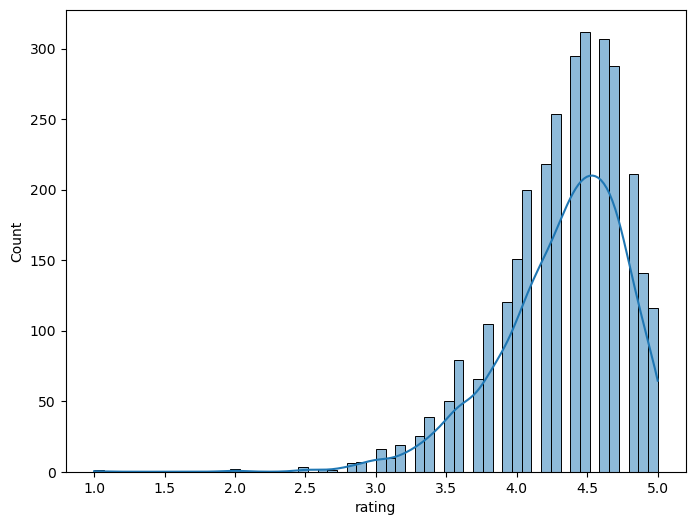

In [192]:
plt.figure(figsize=(8, 6))
sns.histplot(df["rating"], kde=True)

df["rating"].skew()